In [11]:
##############################################################################
#
# This code is part of the publication:
# https://www.biorxiv.org/content/10.1101/2020.11.30.403840v1
#
# The generation of cortical novelty responses through inhibitory plasticity
# Auguste Schulz*, Christoph Miehl*, Michael J. Berry II, Julijana Gjorgjieva
#
# * equal contribution
#
##############################################################################

# Figure oddball paradigm

specify the filename below to check if the simulation was successful

run the following command from 'main' and then copy the corresponding file name 

> nohup julia initsim_oddball_disinhib_ARGS.jl 20 1 300 900 200 0 10 150 &> ../tmp/SSA_disinhibtest_150_normal_ssa_300.txt &


In [12]:
from IPython.display import HTML, IFrame, Image

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import os, fnmatch
import time
import h5py
from scipy.signal import find_peaks, peak_prominences
from scipy import stats
from scipy import optimize
from scipy.signal import decimate
from scipy import signal
import gc
import time

%matplotlib inline


from matplotlib import rcParams, cm
rcParams['grid.linewidth'] = 0
rcParams['pdf.fonttype'] = 42
# import custom functions
from helper_functions import *
import helper_functions

#reload(helper_functions)
from helper_functions import *

from evaluation_functions import *
import evaluation_functions

#reload(evaluation_functions)
from evaluation_functions import *

In [13]:
def cm2inch(*tupl):
    inch = 2.54
    if isinstance(tupl[0], tuple):
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)

figsize_cm = (20,10)
figsize_inch = cm2inch(figsize_cm)
figsize_inch

(7.874015748031496, 3.937007874015748)

In [14]:
file_names = [
    "oddball_200_SUB_0.0_inhibtunning_0.1_ifAAnotAB_false__dur28000.0msNblocks1Ntrain0lenstim300lenpause900Nreps20strength12wadaptfalseiSTDPtrueTime2020-12-16-19-33-23repeatedsequences.h5"
]

In [15]:
avgwindow = 8
timestr = time.strftime("%Y-%m-%d-%H-%M-%S")

RUN_DIR = "../data/"
RESULTS_DIR = "../results/"

FILE_NAME_RUN = [RUN_DIR + file_name for file_name in file_names]

In [16]:
for i,fn in enumerate(file_names):
    print(fn)
    
    E,I, ed, E_hist, E_hist_boxcar, FIG_DIR, E_nov = analyse_filename(fn, avgwindow=avgwindow, timestr=timestr, RUN_DIR = RUN_DIR, RESULTS_DIR=RESULTS_DIR)

spiketimes = 0
gc.collect()

Nseq = 1

oddball_200_SUB_0.0_inhibtunning_0.1_ifAAnotAB_false__dur28000.0msNblocks1Ntrain0lenstim300lenpause900Nreps20strength12wadaptfalseiSTDPtrueTime2020-12-16-19-33-23repeatedsequences.h5
NON ADAPTIVE


/home/auguste/Software/anaconda3/lib/python3.7/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


Text(0.5, 0, 'time locked to onset [s]')

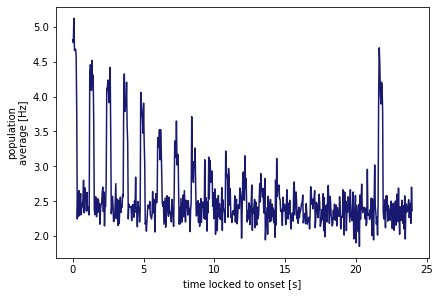

In [17]:
plt.figure(constrained_layout=True)
plt.plot(ed[:-1], E[0][:-1], color = 'midnightblue')
plt.ylabel("population\naverage [Hz]")
plt.xlabel("time locked to onset [s]")

/home/auguste/Software/anaconda3/lib/python3.7/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


Text(0.5, 0, 'stimulus step')

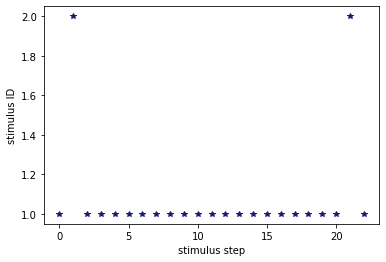

In [18]:
# open file
frun = h5py.File(FILE_NAME_RUN[0], "r")
stimulus  = frun["initial"]['stimulus'].value
# oddball paradigm
plt.plot(stimulus[0], "*", color="midnightblue")
plt.ylabel("stimulus ID") # 1:A 2:B
plt.xlabel("stimulus step")